In [3]:
# Cell 1: Imports & Config

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [7]:
# Cell 2: Load dataset & first look

DATA_PATH = "C:\\Users\\emada\\Desktop\\yt\\Dataset\\US_Videos_Dataset.csv"
  #

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe numeric columns:")
display(df.describe())


Shape: (395915, 15)


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,description,is_trending
0,G4M_621v1As,college farewell video#trending #viralshorts,2025-04-12T02:06:42Z,UC7k_7IF3s3TY-cowwxs_yWw,Vk_07_rider,22.0,2025-11-08,"college farewell video, DDU farewell video, fa...",125784084.0,1557178.0,1583.0,https://i.ytimg.com/vi/G4M_621v1As/default.jpg,0,DDU farewell party video \n college farewell v...,1
1,z2voqo_Jhx4,Busking in Manchester 🇬🇧 #blindfaith #guitar #...,2025-04-06T11:35:53Z,UCM_9JHB3xXPSzJfTkD86AtA,Leonardo Patrick,10.0,2025-11-08,NaN,94744011.0,925529.0,5849.0,https://i.ytimg.com/vi/z2voqo_Jhx4/default.jpg,0,NaN,1
2,jHIt9oHFLsw,This is what happens when you play Star Wars i...,2025-04-06T10:07:12Z,UC4YyKY5o60Kckk-GXOnhT2g,Violin Phonix,22.0,2025-11-08,NaN,61945818.0,1067412.0,4124.0,https://i.ytimg.com/vi/jHIt9oHFLsw/default.jpg,0,Full video : https://www.youtube.com/watch?v=Q...,1
3,gwRqLbWqKlM,LISA - FUTW (YouTube Music Nights Special Stag...,2025-03-19T03:29:33Z,UC6-BgjsBa5R3PZQ_kZ8hKPg,LLOUD Official,10.0,2025-11-08,"Blackpink, Lisa, Music, Fashion, K-Pop, kpop, ...",14555963.0,455816.0,20396.0,https://i.ytimg.com/vi/gwRqLbWqKlM/default.jpg,0,"LISA’s debut album, ‘Alter Ego’ is out now. Li...",1
4,prpRoyrutcE,Uljhi hai yeh kis jaal me tu…. Bengaluru ❤️,2025-04-14T10:17:58Z,UCiFXnvi8ESDukE25ol2foWQ,Mr.KiranJ,10.0,2025-11-08,NaN,26204942.0,336267.0,2333.0,https://i.ytimg.com/vi/prpRoyrutcE/default.jpg,0,NaN,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395915 entries, 0 to 395914
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           395915 non-null  object 
 1   title              395915 non-null  object 
 2   publishedAt        390064 non-null  object 
 3   channelId          395915 non-null  object 
 4   channelTitle       395911 non-null  object 
 5   categoryId         395898 non-null  float64
 6   trending_date      177532 non-null  object 
 7   tags               272004 non-null  object 
 8   view_count         395898 non-null  float64
 9   likes              395898 non-null  float64
 10  comment_count      395898 non-null  float64
 11  thumbnail_link     395915 non-null  object 
 12  comments_disabled  395915 non-null  int64  
 13  description        334405 non-null  object 
 14  is_trending        395915 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory us

,categoryId,view_count,likes,comment_count,comments_disabled,is_trending
count,395898.000000,3.958980e+05,3.958980e+05,3.958980e+05,395915.000000,395915.000000
mean,20.429921,7.615071e+06,1.598290e+05,4.506253e+03,0.018648,0.448409
std,6.516411,4.975822e+07,6.792330e+05,4.490774e+04,0.135278,0.497332
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19.000000,2.674232e+05,5.408000e+03,1.250000e+02,0.000000,0.000000
50%,22.000000,7.870300e+05,2.414250e+04,8.580000e+02,0.000000,0.000000
75%,24.000000,2.737118e+06,8.267825e+04,2.752000e+03,0.000000,1.000000
max,30.000000,4.168919e+09,4.337832e+07,1.048303e+07,1.000000,1.000000


Target value counts:
is_trending
0    0.551591
1    0.448409
Name: proportion, dtype: float64


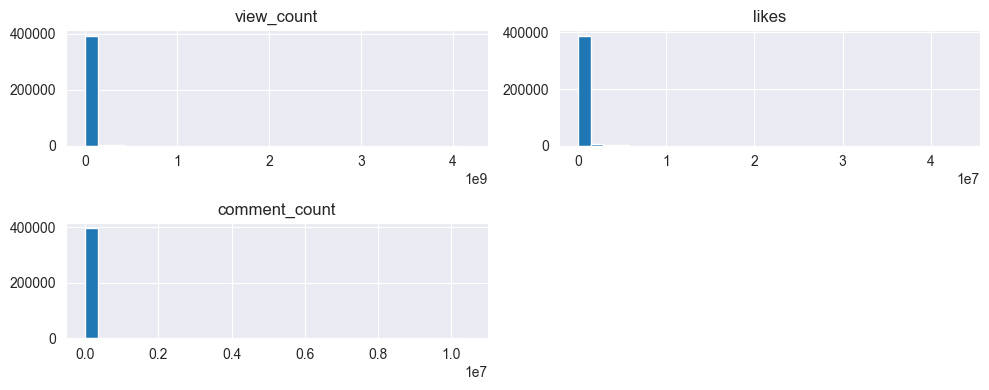

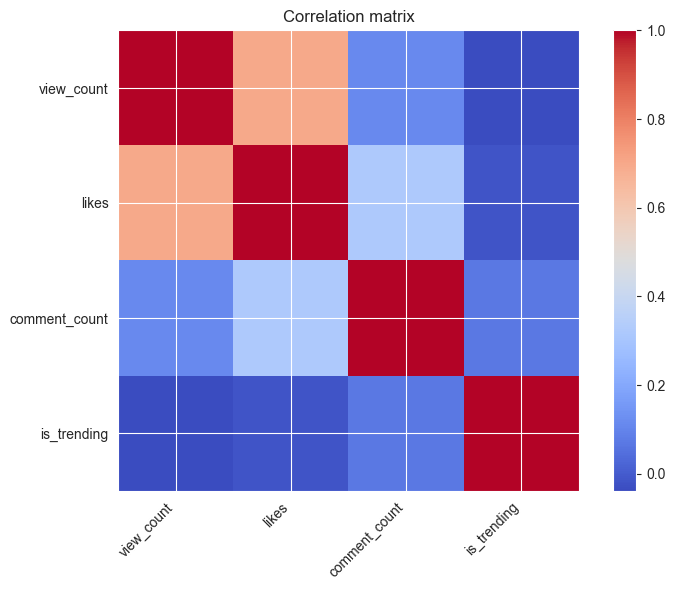

In [8]:
# Cell 3: Basic EDA on target and numeric columns

target_col = "is_trending"   # حسب الداتاسيت عندك

print("Target value counts:")
print(df[target_col].value_counts(normalize=True))

# Histogram لبعض الأعمدة المهمة
numeric_cols = ["view_count", "likes", "comment_count"]
df[numeric_cols].hist(bins=30, figsize=(10, 4))
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
corr = df[numeric_cols + [target_col]].corr()
im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [12]:
# Cell 4: Feature Engineering

# تأكد أن الأعمدة موجودة عندك بنفس الأسماء
text_cols = ["title", "description", "tags"]

for col in text_cols:
    df[col] = df[col].astype(str)

# طول العنوان
df["title_length"] = df["title"].apply(len)

# طول الوصف
df["desc_length"] = df["description"].apply(len)

# عدد التاغات
def count_tags(x):
    if x.strip() == "":
        return 0
    return len(x.split(","))

df["tag_count"] = df["tags"].apply(count_tags)

# تحويل وقت النشر إلى datetime ثم ميزات زمنية
df["publishedAt"] = pd.to_datetime(df["publishedAt"], errors="coerce")
df["pub_year"] = df["publishedAt"].dt.year
df["pub_month"] = df["publishedAt"].dt.month
df["pub_day"] = df["publishedAt"].dt.day
df["pub_hour"] = df["publishedAt"].dt.hour

display(df[["title", "title_length", "desc_length", "tag_count", "publishedAt", "pub_year", "pub_month", "pub_day", "pub_hour"]].head())


,title,title_length,desc_length,tag_count,publishedAt,pub_year,pub_month,pub_day,pub_hour
0,college farewell video#trending #viralshorts,44,105,6,2025-04-12 02:06:42+00:00,2025.0,4.0,12.0,2.0
1,Busking in Manchester 🇬🇧 #blindfaith #guitar #...,95,3,1,2025-04-06 11:35:53+00:00,2025.0,4.0,6.0,11.0
2,This is what happens when you play Star Wars i...,60,56,1,2025-04-06 10:07:12+00:00,2025.0,4.0,6.0,10.0
3,LISA - FUTW (YouTube Music Nights Special Stag...,60,4861,50,2025-03-19 03:29:33+00:00,2025.0,3.0,19.0,3.0
4,Uljhi hai yeh kis jaal me tu…. Bengaluru ❤️,43,3,1,2025-04-14 10:17:58+00:00,2025.0,4.0,14.0,10.0


In [16]:
# Cell 5: Drop unused columns + encode channelId

# أعمدة غير ضرورية للنموذج (نكتفي بالميزات المستخرجة)
cols_to_drop = [
    "video_id",
    "title",
    "description",
    "thumbnail",
    "tags",
    "published",
    "channelTitle"  # لو عندك الاسم بهذا الشكل
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

# ترميز channelId كقيمة عددية
if "channelId" in df.columns:
    le_channel = LabelEncoder()
    df["channelId"] = le_channel.fit_transform(df["channelId"].astype(str))

# التعامل مع القيم المفقودة (بسيط: استبدال بالمتوسط أو القيمة الأكثر تكراراً)
for col in df.columns:
    if df[col].dtype != "object":
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

print("Final columns:")
print(df.columns)


Final columns:
Index(['publishedAt', 'channelId', 'categoryId', 'trending_date', 'view_count',
       'likes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'is_trending', 'title_length', 'desc_length', 'tag_count', 'pub_year',
       'pub_month', 'pub_day', 'pub_hour'],
      dtype='object')


In [18]:
# Cell 6 - FIXED for your dataset

target_col = "is_trending"

X = df.drop(columns=[target_col])
y = df[target_col]

# 1) Remove datetime column
if "publishedAt" in X.columns:
    X = X.drop(columns=["publishedAt"])
    print("Removed datetime column: publishedAt")

# 2) Encode text/object columns
for col in X.columns:
    if X[col].dtype == "object":
        le_temp = LabelEncoder()
        X[col] = le_temp.fit_transform(X[col].astype(str))

# 3) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

# 4) Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling DONE")
print("Train:", X_train_scaled.shape, " Test:", X_test_scaled.shape)


Removed datetime column: publishedAt
Scaling DONE
Train: (316732, 15)  Test: (79183, 15)


In [19]:
# Cell 7: Feature Selection with SelectKBest (Mutual Information)

k_features = min(10, X_train.shape[1])  # اختر 10 أو أقل حسب عدد الأعمدة

selector = SelectKBest(score_func=mutual_info_classif, k=k_features)
selector.fit(X_train_scaled, y_train)

X_train_fs = selector.transform(X_train_scaled)
X_test_fs = selector.transform(X_test_scaled)

selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask]

print("Selected features (k-best):")
for f in selected_features:
    print("-", f)

print("Original shape:", X_train.shape, "After FS:", X_train_fs.shape)


Selected features (k-best):
- channelId
- categoryId
- trending_date
- view_count
- likes
- comment_count
- thumbnail_link
- desc_length
- tag_count
- pub_year
Original shape: (316732, 15) After FS: (316732, 10)


In [20]:
# Cell 8: Simple baseline model (majority class)

majority_class = y_train.mode()[0]
y_pred_baseline = np.full_like(y_test, fill_value=majority_class)

baseline_acc = accuracy_score(y_test, y_pred_baseline)

print("Baseline majority class:", majority_class)
print("Baseline accuracy:", baseline_acc)


Baseline majority class: 0
Baseline accuracy: 0.5515956707879216


In [21]:
# Cell 9: Decision Tree with hyperparameter tuning

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

param_grid_dt = {
    "max_depth": [3, 5, 8, 12, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    scoring="f1",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train_fs, y_train)

print("Best DT params:", grid_dt.best_params_)
print("Best DT CV F1:", grid_dt.best_score_)

best_dt = grid_dt.best_estimator_


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best DT params: {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best DT CV F1: 0.9850653406323329


===== Decision Tree Performance =====
Accuracy : 0.9865248853920665
Precision: 0.9951119928692602
Recall   : 0.9747366642257647
F1       : 0.9848189514121078
ROC AUC  : 0.9987207810954517

Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     43677
           1       1.00      0.97      0.98     35506

    accuracy                           0.99     79183
   macro avg       0.99      0.99      0.99     79183
weighted avg       0.99      0.99      0.99     79183


Confusion matrix:
[[43507   170]
 [  897 34609]]


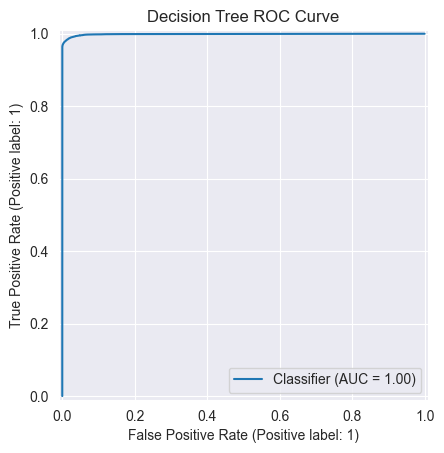

In [22]:
# Cell 10: Evaluate Decision Tree on test set

dt_pred = best_dt.predict(X_test_fs)
dt_proba = best_dt.predict_proba(X_test_fs)[:, 1]

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_roc = roc_auc_score(y_test, dt_proba)

print("===== Decision Tree Performance =====")
print("Accuracy :", dt_acc)
print("Precision:", dt_prec)
print("Recall   :", dt_rec)
print("F1       :", dt_f1)
print("ROC AUC  :", dt_roc)

print("\nClassification report:")
print(classification_report(y_test, dt_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, dt_pred))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, dt_proba)
plt.title("Decision Tree ROC Curve")
plt.show()


In [24]:
# Cell 11: KNN with hyperparameter tuning

knn = KNeighborsClassifier()

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring="f1",
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train_fs, y_train)

print("Best KNN params:", grid_knn.best_params_)
print("Best KNN CV F1:", grid_knn.best_score_)

best_knn = grid_knn.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best KNN CV F1: 0.979254813591125


===== KNN Performance =====
Accuracy : 0.9829508859224834
Precision: 0.9934982372998902
Recall   : 0.9683152143299724
F1       : 0.9807450935645824
ROC AUC  : 0.9899836242889636

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43677
           1       0.99      0.97      0.98     35506

    accuracy                           0.98     79183
   macro avg       0.98      0.98      0.98     79183
weighted avg       0.98      0.98      0.98     79183


Confusion matrix:
[[43452   225]
 [ 1125 34381]]


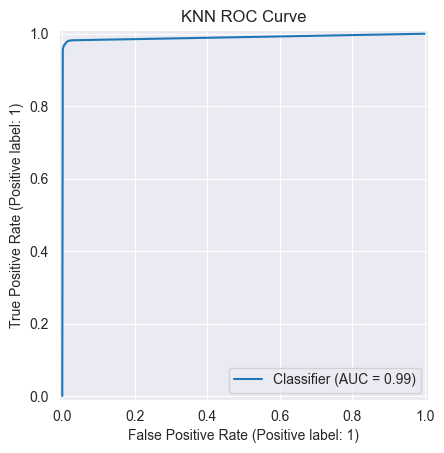

In [25]:
# Cell 12: Evaluate KNN on test set

knn_pred = best_knn.predict(X_test_fs)
knn_proba = best_knn.predict_proba(X_test_fs)[:, 1]

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
knn_rec = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_roc = roc_auc_score(y_test, knn_proba)

print("===== KNN Performance =====")
print("Accuracy :", knn_acc)
print("Precision:", knn_prec)
print("Recall   :", knn_rec)
print("F1       :", knn_f1)
print("ROC AUC  :", knn_roc)

print("\nClassification report:")
print(classification_report(y_test, knn_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, knn_pred))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, knn_proba)
plt.title("KNN ROC Curve")
plt.show()


In [26]:
# Cell 13: Compare models

results = pd.DataFrame({
    "Model": ["Decision Tree", "KNN"],
    "Accuracy": [dt_acc, knn_acc],
    "Precision": [dt_prec, knn_prec],
    "Recall": [dt_rec, knn_rec],
    "F1": [dt_f1, knn_f1],
    "ROC AUC": [dt_roc, knn_roc]
})

display(results)


,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Decision Tree,0.986525,0.995112,0.974737,0.984819,0.998721
1,KNN,0.982951,0.993498,0.968315,0.980745,0.989984
